## Image Compression by Clustering

This was inspired by - https://appliedmachinelearning.wordpress.com/2017/03/08/image-compression-using-k-means-clustering/

In [1]:
from skimage import io
import numpy as np
import os
%matplotlib inline

In [2]:
#Function to display image
def show_img(image):
    io.imshow(image)
    io.show()

#Function to print image size
def file_size(path):
    print "Image Size = {0} MB".format(round(os.stat(path).st_size/(1024*1024.0),2))
    
#Function to save & view details of compressed image
def compress_save_and_view(filepath, c_image):
    io.imsave(filepath, c_image)
    show_img(c_image)
    file_size(filepath)

### Original Image

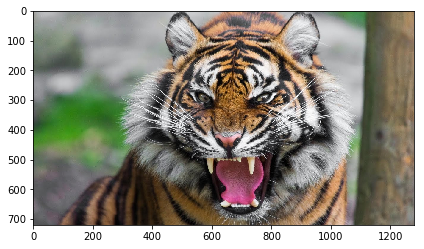

Image Size = 1.72 MB


In [3]:
o_path = 'data/image_compression_clustering/tiger.png'
o_image = io.imread(o_path)
show_img(o_image)
file_size(o_path)

In [4]:
rows = o_image.shape[0]
cols = o_image.shape[1]
o_image.shape

(720L, 1280L, 3L)

In [5]:
o_image[0]

array([[164, 160, 159],
       [165, 161, 160],
       [164, 163, 161],
       ..., 
       [160, 128,  90],
       [158, 125,  90],
       [161, 128,  93]], dtype=uint8)

#### Re-shaping for clustering

In [6]:
o_image_reshape = o_image.reshape(rows*cols,3)
o_image_reshape.shape

(921600L, 3L)

In [7]:
o_image_reshape[0:5]

array([[164, 160, 159],
       [165, 161, 160],
       [164, 163, 161],
       [165, 164, 162],
       [166, 165, 163]], dtype=uint8)

### K-Means

In [8]:
from sklearn.cluster import KMeans
#Fitting k-means
kmeans = KMeans(n_clusters = 50)
kmeans.fit(o_image_reshape)

#Identifying clusters & center values
center_values = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
assigned_clusters = np.asarray(kmeans.labels_,dtype=np.uint8).reshape(rows,cols)

In [9]:
center_values[0:5]

array([[ 31,  28,  29],
       [197, 169, 148],
       [122, 105,  83],
       [ 77,  75,  57],
       [208, 207, 208]], dtype=uint8)

In [10]:
assigned_clusters

array([[18, 18, 18, ..., 37, 37, 37],
       [18, 18, 18, ..., 37, 37, 37],
       [18, 18, 18, ..., 37, 37, 37],
       ..., 
       [26, 26, 26, ..., 39, 39, 39],
       [26, 26, 26, ..., 39, 39, 39],
       [26, 26, 26, ..., 39, 39, 39]], dtype=uint8)

In [11]:
#Replaceing every pixel with its cluster center
c_kmeans_image = np.zeros((rows,cols,3), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        c_kmeans_image[i,j,:] = center_values[assigned_clusters[i,j]]

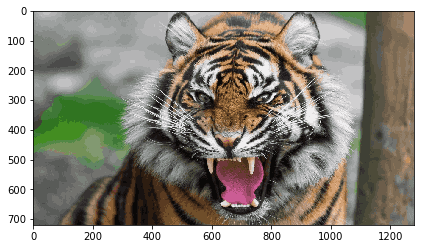

Image Size = 0.53 MB


In [13]:
compress_save_and_view("data/image_compression_clustering/c_kmeans_tiger.png", c_kmeans_image)

#### With 50 clusters, the size of the image as been reduced to less than half the original size.

### DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
#Fitting DBSCAN
dbsc = DBSCAN(eps = 1, min_samples = 15, n_jobs = -1)
dbsc.fit(o_image_reshape)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=15, n_jobs=-1, p=None)

In [9]:
labels = dbsc.labels_
n_clusters = len(set(labels)) - 1
labels_reshape = labels.reshape(rows,cols)
print "Number of clusters = ", n_clusters,"\n"

Number of clusters =  10778 



In [10]:
print labels_reshape

[[  -1   -1    0 ...,   -1   -1  247]
 [  -1   -1  248 ...,   -1  334  335]
 [3358   -1  248 ...,   -1  334  335]
 ..., 
 [ 657  657  596 ..., 8737 7470 7092]
 [ 657  657  596 ..., 8737 7470 7092]
 [ 657  657  596 ..., 9611 7470 7092]]


#### The outlier points identified by DBSCAN are -1

In [11]:
num_of_outliers = sum([i for i in labels if i == -1]) * -1
num_of_outliers

318372

In [12]:
#Identifying all the points belonging to a particular cluster
cluster_points = [o_image_reshape[labels == n] for n in range(0, n_clusters)]

In [13]:
cluster_points[0]

array([[164, 163, 161],
       [164, 163, 161],
       [164, 163, 161],
       [164, 163, 161],
       [164, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [163, 163, 161],
       [164, 163, 161],
       [164, 163, 161],
       [163, 163, 161],
       [163, 163, 161]], dtype=uint8)

In [14]:
cluster_points[1000]

array([[82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83],
       [82, 80, 83]], dtype=uint8)

In [15]:
#Getting the center values for each cluster
center_values = []
for points in cluster_points:
    center_values.append(list(np.average(points, axis = 0).round().astype(int)))

In [16]:
#Replacing all outliers with original pixels and other pixels with the centers of their respective clusters
c_dbscan_image = np.zeros((rows,cols,3), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if labels_reshape[i,j] != -1:
            c_dbscan_image[i,j] = center_values[labels_reshape[i,j]]
        else:
            c_dbscan_image[i,j] = o_image[i,j,:]

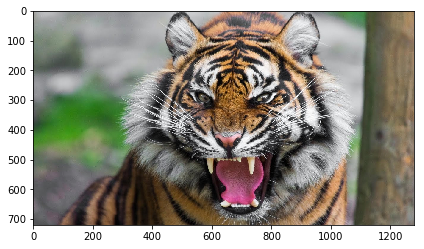

Image Size = 1.24 MB


In [17]:
compress_save_and_view("data/image_compression_clustering/c_dbscan_tiger.png", c_dbscan_image)

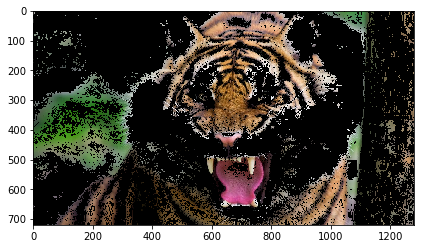

Image Size = 0.86 MB


In [18]:
#Replaceing only outlier points with original image points
c_dbscan_image_outliers = np.zeros((rows,cols,3), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if labels_reshape[i,j] == -1:
            c_dbscan_image_outliers[i,j] = o_image[i,j,:]

compress_save_and_view("data/image_compression_clustering/c_dbscan_oultiers_tiger.png", c_dbscan_image_outliers)